# Tensorflow is a kind of revolution | The Whys

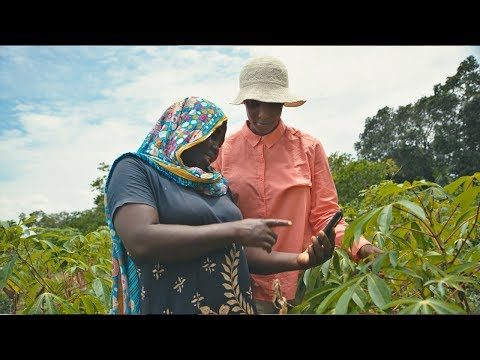

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('NlpS-DhayQA', width= 950, height= 600) 

# The Benefits of Graph Computations

TensorFlow optimizes its computations based on the *graph’s connectivity*. Each graph has its own set of node dependencies. When the input of node y is affected by the output of node x, we say that node y is dependent on node x. We call it a *direct dependency* when the two are connected via an edge, and an indirect dependency otherwise. 

<img src="https://raw.githubusercontent.com/simoneazeglio/MLJCTensorshow/master/Lecture1/Immagini/GraphComputation.png">



**(A)** Illustration of graph dependencies. **(B)** Computing node e results in the minimal amount of computations according to the graph’s dependencies—in this case computing only nodes c, b, and a.

We can always identify the full set of dependencies for each node in the graph. This is a fundamental characteristic of the graph-based computation format. Being able to locate dependencies between units of our model allows us to both distribute computations across available resources and avoid performing redundant computations of irrelevant subsets, resulting in a faster and more efficient way of computing things.

## Graphs, Sessions, and Fetches
[ https://www.tensorflow.org/guide/graphs ]

Right after we import TensorFlow, a specific empty default graph is formed. All the nodes we create are automatically associated with that default graph.

Using the **tf.{operator}** methods, we will create six nodes assigned to arbitrarily named variables. The contents of these variables should be regarded as the output of the operations, and not the operations themselves. For now we refer to both the operations and their outputs with the names of their corresponding variables.
    
The first three nodes are each told to output a constant value. The values 5, 2, and 3 are assigned to a, b, and c, respectively:

In [3]:
# Load tensorflow 
import tensorflow as tf
import numpy as np 
print("Tensorflow version: " + tf.__version__)

Tensorflow version: 1.13.1


In [3]:
# Initialize some variables 
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

Each of the next three nodes gets two existing variables as inputs, and performs simple arithmetic operations on them:

In [4]:
# Make some math 
d = tf.multiply(a,b)
e = tf.add(c,b)
f = tf.subtract(d,e)

Each node, denoted by a lowercase letter, performs the operation indicated above it: *Const* for creating constants and *Add*, *Mul*, and *Sub* for addition, multiplication, and subtraction, respectively. The integer next to each edge is the output of the corresponding node’s operation.

<img src="https://raw.githubusercontent.com/simoneazeglio/MLJCTensorshow/master/Lecture1/Immagini/FirstGraph.png"><br/><br/>



<img src="https://raw.githubusercontent.com/simoneazeglio/MLJCTensorshow/master/Lecture1/Immagini/Shortcuts.png">



### Creating a Session and Running it

First, we launch the graph in a **tf.Session**. A Session object is the part of the *TensorFlow API* that communicates between Python objects and data on our end, and the actual computational system where memory is allocated for the objects we define, intermediate variables are stored, and finally results are fetched for us.

The execution itself is then done with the **.run()** method of the Session object. When called, this method completes one set of computations in our graph in the following manner: it starts at the requested output(s) and then works backward, computing nodes that must be executed according to the set of dependencies. Therefore, the part of the graph that will be computed depends on our output query.

When our computation task is completed, it is good practice to close the session using the **sess.close()** command, making sure the resources used by our session are freed up.

In [5]:
sess = tf.Session()
output = sess.run(f) # f = tf.subtract(d,e) 
sess.close()
print("output = {}".format(output))

output = 5


### Try it yourself !

Can you create graphs A and B? ( *Hint* : to produce the sine function, use **tf.sin(x)** ) 

<img src="https://raw.githubusercontent.com/simoneazeglio/MLJCTensorshow/master/Lecture1/Immagini/Exercise.png">



## Constructing and Managing Graph

As mentioned, as soon as we import TensorFlow, a default graph is automatically created for us. We can create additional graphs and control their association with some given operations. **tf.Graph()** creates a new graph, represented as a *TensorFlow object*

In [6]:
print(tf.get_default_graph())
g = tf.Graph() # Empty Graph 
print(g)

At this point we have two graphs: the default graph and the empty graph in g. Both are revealed as TensorFlow objects when printed. Since g hasn’t been assigned as the default graph, any operation we create will not be associated with it, but rather with the default one.

In [7]:
a = tf.constant(5)
print(a.graph is g) # To check for default graph
print(a.graph is tf.get_default_graph())

False
True


In this code example we see that the operation we’ve created is associated with the default graph and not with the graph in g.
To make sure our constructed nodes are associated with the right graph we can construct them using a very useful Python construct: the **with statement**.

## The "with" statement 
Of all of the most commonly used Python constructs, **context managers** are neck-and-neck with **decorators** in a *"Things I use but don't really understand how they work"* contest.

The with statement is used to wrap the execution of a block with
methods defined by a context manager—an object that has the special
method functions .__enter__() to set up a block of code
and .__exit__() to exit the block. 

In our case we use with to set up a graph and make sure every piece of code will be performed in the context of that graph. (The with statement for real : https://jeffknupp.com/blog/2016/03/07/improve-your-python-the-with-statement-and-context-managers/) 

In [8]:
g1 = tf.get_default_graph()
g2 = tf.Graph()

print(g1 is tf.get_default_graph())

with g2.as_default():
    print(g1 is tf.get_default_graph())
    
print(g1 is tf.get_default_graph())

True
False
True


Opening a session using the with clause will ensure the session is automatically closed once all computations are done.

## Fetches

In our initial graph example, we request one specific node (*node f*) by passing the variable it was assigned to as an argument to the **sess.run()** method. This argument is called fetches, corresponding to the elements of the graph we wish to compute. We can also ask **sess.run()** for multiple nodes’ outputs simply by inputting a list of requested nodes: 

In [9]:
with tf.Session() as sess:
    fetches = [a,b,c,d,e,f]
    outs =sess.run(fetches)
    
print("outs = {}".format(outs))
print(type(outs[0]))

outs = [5, 2, 3, 10, 5, 5]
<class 'numpy.int32'>


# Flowing Tensors
## Nodes are operations, edges are tensor objects | Tensor + Flow = Data + Flow 
<img src="https://raw.githubusercontent.com/simoneazeglio/MLJCTensorshow/master/Lecture1/Immagini/mind=blown.gif">

When we construct a node in the graph, like we did with **tf.add()**, we are actually
creating an operation instance. These operations do not produce actual values until
the graph is executed, but rather reference their to-be-computed result as a handle
that can be passed on — *flow* — to another node. These handles, which we can think of
as the edges in our graph, are referred to as Tensor objects, and this is where the
name TensorFlow originates from.

TensorFlow is designed such that first a skeleton graph is created with all of its components. At this point no actual data flows in it and no computations take place. It is only upon execution, when we run the session, that data enters the graph and computations occur.
This way, computations can be much more efficient, taking the entire graph structure into consideration.


<img src="https://raw.githubusercontent.com/simoneazeglio/MLJCTensorshow/master/Lecture1/Immagini/dataflow.png">




In [10]:
c = tf.constant(4.0)
print(c)

Tensor("Const_4:0", shape=(), dtype=float32)


# Data Types

The basic units of data that pass through a graph are numerical, Boolean, or string elements.
Since we didn’t specify the type of data, TensorFlow inferred it automatically.
We can explicitly choose what data type we want to work with by specifying it when we create the Tensor object.

In [11]:
c = tf.constant(4.0, dtype=tf.float64)
print(c)
print(c.dtype)

Tensor("Const_5:0", shape=(), dtype=float64)
<dtype: 'float64'>


In [12]:
v = tf.constant("4.0", dtype=tf.string)
print(v)
print(v.dtype)

Tensor("Const_6:0", shape=(), dtype=string)
<dtype: 'string'>


## Casting

It is important to make sure our data types match throughout the graph - performing an operation with nonmatching data types will result in an exception. To change the data type setting of a Tensor object, we can use the **tf.cast()** operation, passing the relevant 
Tensor and the new data type of interest as first and second arguments respectively.


In [13]:
x = tf.constant([1,2,3], name='x', dtype=tf.float32)
print(x.dtype)
x = tf.cast(x,tf.int64)
print(x.dtype)

<dtype: 'float32'>
<dtype: 'int64'>


In [14]:
x = tf.cast(x,tf.string) # Try to run it, casting from float to string is not supported at all 
print(x.dtype) 
print(x)

<dtype: 'string'>
Tensor("Cast_1:0", shape=(3,), dtype=string)


<img src="https://raw.githubusercontent.com/simoneazeglio/MLJCTensorshow/master/Lecture1/Immagini/DataTypes.png">

## Tensor Arrays and Shapes

A source of potential confusion is that two different things are referred to by the name, Tensor. As used in the previous sections, Tensor is the name of an object used in the Python API as a handle for the result of an operation in the graph. However, tensor is also a mathematical term for n-dimensional arrays. For example, a *1×1* tensor is a scalar, a *1×n* tensor is a vector, an *n×n* tensor is a matrix, and an *n×n×n* tensor is just a three-dimensional array. This, of course, generalizes to any dimension. TensorFlow regards all the data units that flow in the graph as tensors, whether they are multidimensional arrays, vectors, matrices, or scalars. The TensorFlow objects called Tensors are named after these mathematical tensors.

Using scalars is good for demonstration purposes, but most of the time it’s much more practical to work with multidimensional arrays. To initialize high-dimensional arrays, we can use **Python lists** or **NumPy arrays** as inputs. In the following example,
we use as inputs a *2×3* matrix using a Python list and then a 3D NumPy array of size *2×2×3* (two matrices of size 2×3):

In [15]:
import numpy as np

c = tf.constant([[1,2,3],[4,5,6]])

print("Python List input: {}".format(c.get_shape()))

c = tf.constant(np.array
                ([
                    [[1,2,3], 
                    [4,5,6]], 
                    [[1,1,1], 
                    [2,2,2]]
                            ])) 
print("3d NumPy array input: {}".format(c.get_shape()))

Python List input: (2, 3)
3d NumPy array input: (2, 2, 3)


The **get_shape()** method returns the shape of the tensor as a *tuple* of integers. The number of integers corresponds to the 
number of dimensions of the tensor and each integer is the numter of array entries along that dimension.

### Interactive Session 

**tf.InteractiveSession()** allows you to replace the usual **tf.Session()**, so that you don’t need a variable holding the session for running ops. This can be useful in interactive Python environments, like when writing IPython notebooks, for instance.


In [16]:
sess = tf.InteractiveSession()
c = tf.linspace(0.0, 4.0, 5)
print("The content of 'c' : \n {} \n".format(c.eval()))
sess.close()

The content of 'c' : 
 [0. 1. 2. 3. 4.] 



The sequence generator **tf.linspace(a,b,n)** where n evenly spaced values from a to b. (~ numpy.linspace() ) 

### More Initializers 

<img src="https://raw.githubusercontent.com/simoneazeglio/MLJCTensorshow/master/Lecture1/Immagini/Initializers.png">

## Matrix Multiplication 

Say we have a Tensor storing a matrix A and another storing a vector x, and we wish to compute the matrix product of the
two:
    Ax = b.
This can be achieved by **tf.matmul(A,x)**

In [17]:
A = tf.constant([ [1,2,3],
                      [4,5,6] ])
print(A.get_shape())
x = tf.constant([1,0,1])
print(x.get_shape())

(2, 3)
(3,)


In order to multiply them, we need to add a dimension to x, transforming it from a 1D vector to a 2D single-column matrix. (Mmmmmm .. ) 

In [18]:
x = tf.expand_dims(x,1) 
print(x.get_shape())

b = tf.matmul(A,x)
sess = tf.InteractiveSession()
print('\nmatmul result:\n {}'.format(b.eval())) 
sess.close()

(3, 1)

matmul result:
 [[ 4]
 [10]]


In [19]:
print(b.get_shape()) # Ok

(2, 1)


## Names

Each Tensor object has an identifying name. This name is an intrinsic string name, not to be confused with the name of the
variable. As with *dtype*, we can use the **.name** attribute to see the name of the object.

In [20]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.float64, name = "c")
    c2 = tf.constant(4, dtype=tf.int32, name = "c")
    
print(c1.name)
print(c2.name)

c:0
c_1:0


The name of the Tensor object is simply the name of its corresponding operation (“c”; concatenated with a colon), followed by the index of that tensor in the outputs of the operation that produced it—it is possible to have more than one.

Objects residing within the same graph cannot have the same name - TensorFlow forbids it. As a consequence, it will
automatically add an underscore/space and a number to distinguish the two. Both objects can have the same name 
when they are associated with different graphs.

### Name scopes 

In some cases when dealing with a large, complicated graph, we would like to create some node grouping to make it easier
to follow and manage. This is done by using **tf.name_scope("prefix")** together with the useful with clause again:
    

In [21]:
with tf.Graph().as_default():
    c1 = tf.constant(4, dtype=tf.float64, name = "c")
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4, dtype=tf.int32, name = "c")
        c3 = tf.constant(4, dtype=tf.float64, name = "c")
    
    print(c1.name)
    print(c2.name)
    print(c3.name)

c:0
prefix_name/c:0
prefix_name/c_1:0


In this example we have grouped objects contained in variable c2 and c3 under the scope prefix_name, which show up as 
a prefix in their names. This is useful for visualization of the graph structure.

# Variables, Placeholders and Simple Optimization
## Variables 
[ https://www.tensorflow.org/guide/variables ]

TensorFlow uses special objects called *Variables*. Unlike other Tensor objects that are
"refilled" with data each time we run the session. Variable can maintain a fixed
state in the graph. Variables can be used as input for other operations in the graph. So, they exist outside the context of a single **session.run()** call.

Variable usages are of two stages. First we call the **tf.Variable()** function in order to create a Variable and define what value it will be initialized with. We then have to explicitly perform an initialization operation by running the session with the **tf.global_variables_initializer()** method, which allocates the memory for the Variable and sets its initial values.

In [22]:
init_val = tf.random_normal((1,5), mean =  0, stddev= 1)
var = tf.Variable(init_val, name= 'var')
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init) 
    post_var = sess.run(var)
    
print("\npost run: \n{}".format(post_var))

Instructions for updating:
Colocations handled automatically by placer.
pre run: 
<tf.Variable 'var:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[ 1.433091   -0.82340914 -1.760877    0.03863439  0.600869  ]]


Note that if we run the code again, we see that a new variable is created each time, as indicated by the automatic concatenation of _1 to its name:

This could be very inefficient when we want to reuse the model (complex models could have many variables!); for example, when we wish to feed it with several different inputs. To reuse the same variable, we can use the **tf.get_variable()** function instead of **tf.Variable()**

In [23]:
my_variable = tf.get_variable("my_variable", [1, 2, 3])

## Placeholders

TensorFlow, has designated built-in structures for feeding input values. These structures are called **placeholders**. Placeholders can be thought of as empty Variables that will be filled with data later on. We use them by first constructing our graph and only when it is executed feeding them with the input data.

Placeholders have an optional shape argument. If a shape is not fed or is passed as None, then the placeholder can be fed with data of any size. It is common to use None for the dimension of a matrix that corresponds to the number of samples (usually rows), while having the length of the features (usually columns) fixed:

In [24]:
ph = tf.placeholder(tf.float32, shape=(None, 10))

Whenever we define a placeholder, input  values must be fed to it or else exception will be thrown.
The input data is passed to the **session.run()** method as a *dictionary*, where each key corresponds to a placeholder variable name, and the matching values are the data values given in the form of a list or a *NumPy* array

In [25]:
#sess.run(s, feed_dict= {x :x_data, w: w_data})

Let’s see how it looks with another graph example, this time with placeholders for two inputs: a matrix **x** and a vector **w**. These inputs are matrix-multiplied to create a five-unit vector **xw** and added with a constant vector  **b** filled with the value -1. Finally, the variable s takes the maximum value of that vector by using the **tf.reduce_max()** operation. The word reduce is used because we are reducing a five-unit vector to a single scalar:

In [26]:
x_data = np.random.randn(5,10) 
w_data = np.random.randn(10,1)

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, shape=(5,10))
    w = tf.placeholder(tf.float32, shape=(10,1))
    b = tf.fill((5,1),-1.)
    xw = tf.matmul(x,w)
    xwb = xw + b
    s = tf.reduce_max(xwb)
    with tf.Session() as sess:
        outs = sess.run(s,feed_dict={x: x_data, w: w_data})
        
print("outs = {}".format(outs))


outs = 2.357882022857666


## Optimization

We first describe the basics of training a model, giving a short description of each component in the process, and show how it is performed in TensorFlow

### Training to predict 
We have some target variable __y__, which we want to explain using some feature vector **x**. To do so, we first choose a model that relates the two. Our training data points will be used for *tuning* the model so that it best captures the desired relation. In the following chapters we focus on deep neural network models, but for now we will settle for a simple regression problem.

Let's start by describing our regression model: 

\begin{align}
f(x_i)  = w^Tx_i + b   \\
y_i = f(x_i) + \epsilon_i\\
\end{align}

$f(x_i)$ is assumed to be a linear combination of some input data $x_i$, with a set of weights $w$ and an intercept $b$. Our target output $y_i$ is a noisy version of $f(x_i)$ after being summed with Gaussian noise $\epsilon_i$ (where $i$ denotes a given sample).

As in the previous example, we will need to create the appropriate placeholders for our input and output data and Variables for our weights and intercept:

In [4]:
x = tf.placeholder(tf.float32,shape=[None,3])
y_true = tf.placeholder(tf.float32,shape=None)
w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
b = tf.Variable(0,dtype=tf.float32,name='bias')

Instructions for updating:
Colocations handled automatically by placer.


Once the placeholders and Variables are defined, we can write down our model. In this example, it’s simply a multivariate linear regression—our predicted output y_pred is the result of a matrix multiplication of our input container x and our weights w plus a bias term b:


In [5]:
y_pred = tf.matmul(w,tf.transpose(x)) + b

### Defining a loss function

Next, we need a good measure with which we can evaluate the model’s performance. To capture the discrepancy between our model’s predictions and the observed targets, we need a measure reflecting *distance.* This distance is often referred to as an objective or a **loss function**, and we optimize the model by finding the set of parameters (weights and bias in this case) that minimize it.

There is no ideal loss function, and choosing the most suitable one is often a blend of art and science. The choice may depend on several factors, like the assumptions of our model, how easy it is to minimize, and what types of mistakes we prefer to avoid.

### MSE and Cross Entropy 

The most commonly used loss is the __MSE__ (Mean Squared Error), where for all samples we average the squared distances between the real target and what our model predicts: 

$L(y,\hat{y}) = \frac{1}{n} \sum_{i = 1}^{n}(y_i - \hat{y}_i)^2$

This loss minimizes, intuitively, the mean square difference between an observed value and the model's fitted value. 



## Linear Regression 

Example 1: In this problem we are interested in retrieving a set of 
    weights w and a bias term b, assuming our target value is a linear
    combination of some input vector x, with an additional Gaussian noise Ei added to each sample.
    

In [1]:
# Create data and simulate results
x_data = np.random.randn(2000,2)
w_real = [0.3,0.5]
b_real = -0.2

noise = np.random.randn(1,2000)*0.1 #  Gaussian noise 
y_data = np.matmul(w_real, x_data.T) + b_real + noise

# Iterations 
NUM_STEPS = 10

g = tf.Graph()
wb_ = []


# Create Graph 
with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None,2])
    y_true = tf.placeholder(tf.float32,shape=None)
   
    # Back on scope definition
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b
        
    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))
        
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss) 
        
        
    # Before starting, initialize the variables. We will 'run' this first.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))
        print(10, sess.run([w,b]))      
        


NameError: name 'np' is not defined

From the above result, after only 10 iterations, the estimated weights and bias are **w =[0.300,0.499]** and 
**b = -0.199.**


## Logistic Regression 

Example 2: Logistic regression. We wish to retrieve the weights and bias components in a simulated data setting, this time in a
    logistic regression framework. In this case, the linear component wTx + b is the input of a nonlinear function called 
    the logistic function. What it effectively does is squash the values of the linear part into the interval [0,1].

The logistic function we are using is called sigmoid function. We generate our samples by using the same set of weights and biases as in the previous example:

In [28]:
# Your Version 









In [30]:
# Our solution is gonna be uploaded on March 26th 


### References 

1) Learning Tensorflow: A Guide to Building Deep Learning Systems | T.Hope, Y.S. Resheff , I. Lieder 

2) https://www.tensorflow.org/guide/graphs 